In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#Importing dataset

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


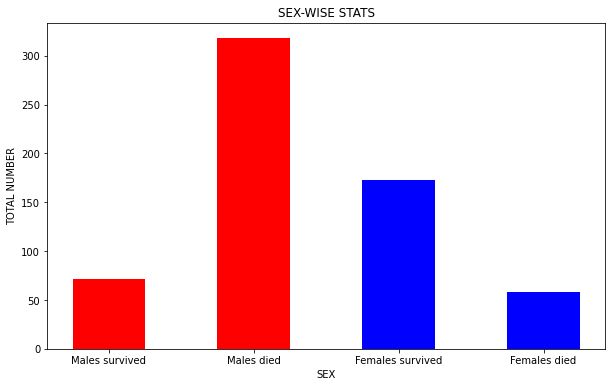

In [3]:
#Analyzing Survival Rate with parameter 'Sex'

mcount0 = mcount1 = fcount0 = fcount1 = 0
for i in range(0 , len(df)):
    if df.iat[i,3] == "male":
        if df.iat[i,1] == 1:
            mcount1 = mcount1 + 1
        else:
            mcount0 = mcount0 + 1  
    else:
        if df.iat[i,1] == 1:
            fcount1 = fcount1 + 1
        else:
            fcount0 = fcount0 + 1

#print(f"{mcount1 + mcount0 + fcount1 + fcount0}")
dataset = list(("Males survived","Males died","Females survived","Females died"))     
count = list((mcount1,mcount0,fcount1,fcount0))
plt.figure(figsize = (10,6))
plt.bar(dataset, count, color =['red','red','blue','blue'],width = 0.5)
plt.xlabel("SEX")
plt.ylabel("TOTAL NUMBER")
plt.title("SEX-WISE STATS")
plt.show()

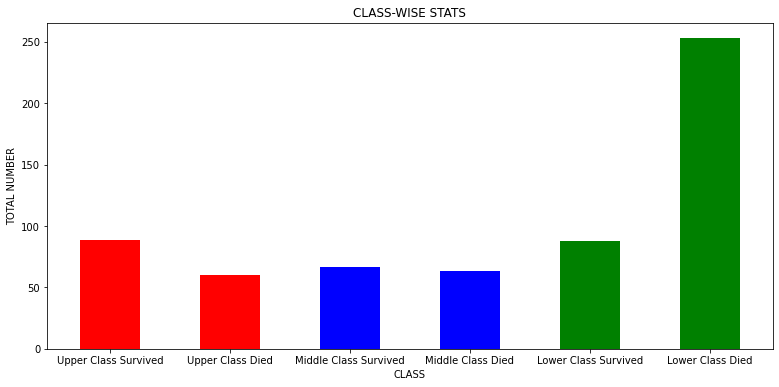

In [4]:
#Analyzing Survival Rate with parameter 'PClass'

Pclass10 = Pclass11 = Pclass20 = Pclass21 = Pclass30 = Pclass31 = 0
for i in range(0 , len(df)):
    if df.iat[i,2] == 1:
        if df.iat[i,1] == 1:
            Pclass11 = Pclass11 + 1
        else:
            Pclass10 = Pclass10 + 1  
    elif df.iat[i,2] == 2:
        if df.iat[i,1] == 1:
            Pclass21 = Pclass21 + 1
        else:
            Pclass20 = Pclass20 + 1
    elif df.iat[i,2] == 3:
        if df.iat[i,1] == 1:
            Pclass31 = Pclass31 + 1
        else:
            Pclass30 = Pclass30 + 1

#print(f"{Pclass10 + Pclass11 +Pclass20 + Pclass21 + Pclass30 + Pclass31}")
dataset1 = list(("Upper Class Survived","Upper Class Died","Middle Class Survived","Middle Class Died","Lower Class Survived","Lower Class Died"))     
count1 = list((Pclass11,Pclass10,Pclass21,Pclass20,Pclass31,Pclass30))
plt.figure(figsize = (13,6))
plt.bar(dataset1, count1, color =['red','red','blue','blue','green','green'],width = 0.5)
#for dataset1, count1 in enumerate(count1):
    #plt.text(count1, dataset1, str(value))
plt.xlabel("CLASS")
plt.ylabel("TOTAL NUMBER")
plt.title("CLASS-WISE STATS")
plt.show()

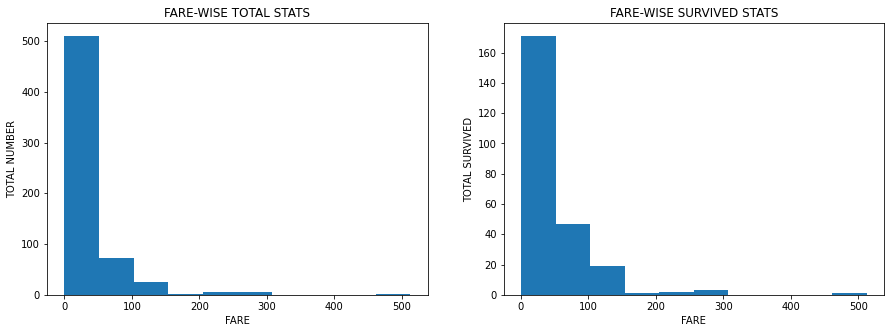

In [5]:
#Analyzing Survival Rate with parameter 'Fare'
fare_data = df["Fare"]

plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
plt.hist(fare_data)
plt.xlabel("FARE")
plt.ylabel("TOTAL NUMBER")
plt.title("FARE-WISE TOTAL STATS")

fare_alive = []
for i in range(0 , len(df)):
    if df.iat[i,1] == 1:
        fare_alive.append(df.iat[i,7])

plt.subplot(1, 2, 2)
plt.hist(fare_alive)
plt.xlabel("FARE")
plt.ylabel("TOTAL SURVIVED")
plt.title("FARE-WISE SURVIVED STATS")

plt.show()

# Important Data
All the data seems important for predicting the values of 'Survived'<br />
In the 3rd Graph, around 500 people are in the '0-50' fare but only around 170 survive. Whereas around 80 people are in the '50-100' fare but around 50 survive. So 'Fare' can be important criteria too.<br />
We will remove the 'PassengerId' column and use the rest of the data.

In [6]:
#Converting males to 1 and females to 0 to get data in int
for i in range(0 , len(df)):
    if df.iat[i,3] == "male":
        df.iat[i,3] = int(1)
    else:
        df.iat[i,3] = int(0)

In [7]:
#Defining Sigmoid Function
def sigmoid(input):    
    output = 1 / (1 + np.exp(-input))
    return output

In [8]:
#Defining logistic regression formulas 
def model(X, Y, learning_rate, iterations):
    
    #Shape of matrix
    m = X.shape[1]
    n = X.shape[0]
    
    #Definig Weight and Bias
    W = np.zeros((n,1))
    B = 0
    
    for i in range(iterations):
        
        #Predicting Y
        Y_input = np.dot(W.T, X) + B
        Y_pred = sigmoid(Y_input)
        
        #Cost function
        cost = -(1/m)*np.sum( Y*np.log(Y_pred) + (1-Y)*np.log(1-Y_pred))
        
        #Gradient Descent
        dW = (1/m)*np.dot(Y_pred-Y, X.T)
        dB = (1/m)*np.sum(Y_pred - Y)
        
        #Updating values
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
    
    print("Final cost function is : ", cost)    
    return W, B, cost

In [9]:
#Defining accuracy, log loss and F1 score
# df is a dataframe with 3 columns: (i)'Survived' : real values (ii)'Predicted values' : rounded off to 0 and 1
#(iii)'Real Predicted values' : without rounding off

def review(df):
    
    true_pos = true_neg = false_pos = false_neg = 0
    
    for i in range(0,len(df)):
        if df.iat[i,0] == 0 and df.iat[i,1] == 0:
            true_neg += 1
        if df.iat[i,0] == 1 and df.iat[i,1] == 1:
            true_pos += 1
        if df.iat[i,0] == 0 and df.iat[i,1] == 1:
            false_pos += 1
        if df.iat[i,0] == 1 and df.iat[i,1] == 0:
            false_neg += 1
    
    # Calculating accuracy
    accuracy = ((true_pos + true_neg)*100)/len(df)
    print("Accuracy : ", round(accuracy, 3), "%")
    
    # Our cost function is same as log losses by defination. However, I have still calculated it mathematically below
    from math import log
    sum = 0
    for i in range(0,len(df)):
        Y = df.iat[i,0]
        p = df.iat[i,2]
        sum = sum + Y*log(p) + (1-Y)*log(1-p)
    loss = -(sum)/len(df)
    print("Log Loss : ", round(loss, 3))
    
    # Calculating F1 score
    f1 = true_pos/(true_pos + (false_pos + false_neg)/2)
    print("F1 Score : ", round(f1, 3))

In [10]:
# Since the Age column has missing values, I will test out the accuracy using three different methods.

#Method 1 is where all NaN values will be replaced by 0
df1 = df.fillna(0)
#Rounding off float values in 'Age' 
for i in range(0 , len(df1)):  
    df1.iat[i,4] = round(df1.iat[i,4])

#Method 2 is where I drop all the NaN rows
df2 = df
df2["Sex"] = df1["Sex"]
df2 = df2.dropna()
for i in range(0 , len(df2)):  
    df2.iat[i,4] = round(df2.iat[i,4])

#Method 3 is where I replace all NaN values by mean
Mean_age = int(df2["Age"].mean())
df3 = df
df3["Age"].fillna(Mean_age, inplace = True)
df3["Sex"] = df3["Sex"]
for i in range(0 , len(df3)):  
    df3.iat[i,4] = round(df3.iat[i,4])

In [11]:
Xt1 = df1[['Pclass','Sex','Age','SibSp','Parch','Fare']]
yt1 = df1['Survived']

Xt2 = df2[['Pclass','Sex','Age','SibSp','Parch','Fare']]
yt2 = df2['Survived']

Xt3 = df3[['Pclass','Sex','Age','SibSp','Parch','Fare']]
yt3 = df3['Survived']

In [12]:
# Converting into numpy arrays
Xt1 = Xt1.values
yt1 = yt1.values

Xt2 = Xt2.values
yt2 = yt2.values

Xt3 = Xt3.values
yt3 = yt3.values

# Reshaping into matrix forms 
Xt1 = Xt1.T
yt1 = yt1.reshape(1, Xt1.shape[1])

Xt2 = Xt2.T
yt2 = yt2.reshape(1, Xt2.shape[1])

Xt3 = Xt3.T
yt3 = yt3.reshape(1, Xt3.shape[1])

# Verifying the Shapes
print("Shape of Xt1 : ", Xt1.shape)
print("Shape of yt1 : ", yt1.shape)

print("Shape of Xt2 : ", Xt2.shape)
print("Shape of yt2 : ", yt2.shape)

print("Shape of Xt3 : ", Xt3.shape)
print("Shape of yt3 : ", yt3.shape)

Shape of Xt1 :  (6, 620)
Shape of yt1 :  (1, 620)
Shape of Xt2 :  (6, 489)
Shape of yt2 :  (1, 489)
Shape of Xt3 :  (6, 620)
Shape of yt3 :  (1, 620)


In [13]:
it = 200000
lr = 0.002
W1, B1, cost1= model(Xt1, yt1, lr, it)

Final cost function is :  0.4601124107498892


In [14]:
W2, B2, cost2 = model(Xt2, yt2, lr, it)

Final cost function is :  0.46151671942061623


In [15]:
W3, B3, cost3 = model(Xt3, yt3, lr, it)

Final cost function is :  0.45271472277273084


In [16]:
#Converting into desired dataframe for review

def dataframe(dfj, X, W, B):
    Y_input = np.dot(W.T, X) + B
    Y_pred = sigmoid(Y_input)
    Real_Predictions = list(Y_pred.flatten())
    Predictions = []
    for i in range(0,len(X.T)):
        if Real_Predictions[i] >= 0.5:
            Predictions.append(1)
        else:
            Predictions.append(0)
    #dfi = dfj
    dfj["Prediction"] = Predictions
    dfj["Real_Prediction"] = Real_Predictions
    dfi = dfj[['Survived','Prediction','Real_Prediction']]
    return dfi

df_train1 = dataframe(df1, Xt1, W1, B1)
df_train2 = dataframe(df2, Xt2, W2, B2)
df_train3 = dataframe(df3, Xt3, W3, B3)

#print(df_test.to_string())

<ipython-input-16-dfc25957124b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfj["Prediction"] = Predictions
<ipython-input-16-dfc25957124b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfj["Real_Prediction"] = Real_Predictions


In [17]:
review(df_train1)

Accuracy :  79.516 %
Log Loss :  0.46
F1 Score :  0.728


In [18]:
review(df_train2)

Accuracy :  78.528 %
Log Loss :  0.462
F1 Score :  0.729


In [19]:
review(df_train3)

Accuracy :  80.645 %
Log Loss :  0.453
F1 Score :  0.741


# Review
We find that Method 3 : Replacing empty 'age' cells with mean gives us the maximum accuracy. <br />
We will use this method, using variables W3 and B3, to find the predictions of Test.csv

In [20]:
df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,621,0,3,male,27.0,1,0,14.4542
1,622,1,1,male,42.0,1,0,52.5542
2,623,1,3,male,20.0,1,1,15.7417
3,624,0,3,male,21.0,0,0,7.8542
4,625,0,3,male,21.0,0,0,16.1000


In [21]:
for i in range(0 , len(df_test)):
    if df_test.iat[i,3] == "male":
        df_test.iat[i,3] = 1
    else:
        df_test.iat[i,3] = 0

df1_test = df_test.fillna(0)
df2_test = df_test.dropna()

Mean_age = int(df2_test["Age"].mean())
df3_test = df_test
df3_test["Age"].fillna(Mean_age, inplace = True)
df3_test["Sex"] = df1_test["Sex"]
for i in range(0 , len(df3_test)):  
    df3_test.iat[i,4] = round(df3_test.iat[i,4])
    
df3_test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,621,0,3,1,27.0,1,0,14.4542
1,622,1,1,1,42.0,1,0,52.5542
2,623,1,3,1,20.0,1,1,15.7417
3,624,0,3,1,21.0,0,0,7.8542
4,625,0,3,1,21.0,0,0,16.1000


In [22]:
X_test = df3_test[['Pclass','Sex','Age','SibSp','Parch','Fare']]
X_test = X_test.values
X_test = X_test.T
#print("Shape of X_test : ", X_test.shape)
final = dataframe(df3_test, X_test, W3, B3)
print(final.to_string())

     Survived  Prediction  Real_Prediction
0           0           0         0.096644
1           1           0         0.286149
2           1           0         0.111429
3           0           0         0.143740
4           0           0         0.144496
5           0           0         0.241522
6           0           0         0.130179
7           1           1         0.930415
8           0           0         0.128012
9           0           0         0.119283
10          1           0         0.160339
11          0           0         0.069795
12          1           0         0.409059
13          0           0         0.423098
14          0           1         0.559623
15          1           1         0.818995
16          0           0         0.111099
17          0           0         0.180052
18          0           1         0.545856
19          0           0         0.092164
20          0           0         0.147073
21          1           1         0.924573
22         

In [23]:
review(final)

Accuracy :  78.967 %
Log Loss :  0.436
F1 Score :  0.678


# Conclusion
From our model on Train.csv, we are able to predict the Survival Rate of people on Titanic with 78.967% Accuracy.